<a href="https://colab.research.google.com/github/LuisaUpegui/boston_housing/blob/main/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive #Dar acceso al drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/Coding dojo/Modulo 2/archivos/Boston_Housing_from_Sklearn.csv"
df = pd.read_csv(path)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [ ]:
#1) Realicen un mapa de calor de las correlaciones.  Identifiquen cualquier característica que tenga un coeficiente de
# correlación de magnitud 0,5 (puede ser + o -) o mayor con el precio. 
#Limitaremos nuestros análisis de estas tres características.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


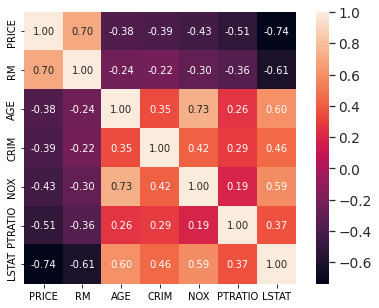

In [8]:
corr = df.corr() 
k = 7 #number of variables for heatmap
plt.subplots(figsize=(7,5))
cols = corr.nlargest(k, 'PRICE')['PRICE'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#La variable RM (número promedio de habitaciones por vivienda )tiene una correlación positiva de 0.70 con la variable a predecir PRICE
#Las variables PTRATIO(proporción de alumnos por profesor por ciudad) Y LSTAT( % de menor nivel económico de la población) tienen una correlación negativa de 0.51 y 0.74 respectivamente, con la variable a predecir PRICE

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [14]:
#2) Seleccionen las columnas para la matriz de características (X) y seleccionen el PRECIO para el vector objetivo (y).
X = df.drop(columns=['CRIM','PRICE','NOX','AGE'])
y = df['PRICE']

In [15]:
#3)Dividan los datos en grupos de entrenamiento y de prueba. ¡Usen el número 42 para la consistencia!
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression


In [18]:
#4)a. Instancien el modelo y ajústenlo al conjunto de entrenamiento
reg = LinearRegression()


In [20]:
# 4-b ajustar el modelo
reg.fit(X_train,y_train)


LinearRegression()

**METRICAS**

In [26]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [28]:
# Obtengan las predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train)
# Obtengan las predicciones del conjunto de prueba
test_preds = reg.predict(X_test)


In [29]:
#5) Evaluar el modelo de rendimiento en el conjunto de entrenamiento y de prueba usando la puntuación R^2
#a. DATOS DE ENTRENAMIENTO
r2_train = r2_score(y_train, train_preds)
#b. DATOS DE PRUEBA
r2_test = r2_score(y_test, test_preds)

In [31]:
#¿Existe alguna diferencia entre el modelo de rendimiento en los datos de entrenamiento vs. los datos de prueba?

#El modelo funciona un poco mejor en el conjunto de datos de entrenamiento, este adquiere un R2 de 68% mientras que para 
#el modelo con el conjunto de datos de prueba este adquiere un R2 de 63%. Aunque esta diferencia en el rendimiento 
#no es muy grande.

In [33]:
#6) Evalúen el modelo usando el error absoluto medio (EAM).
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)


In [34]:
mae_train

3.714054057158005

In [35]:
mae_test

3.3918448293813976

In [37]:
#7) Evalúen el modelo usando el error cuadrático medio (ECM)
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

In [38]:
mse_train

27.68673681796949

In [39]:
mse_test

25.688824196675952

In [40]:
#8) Evalúen el modelo de rendimiento usando RECM en el conjunto de entrenamiento y de prueba. 
#Esta métrica es útil porque las unidades estarán en las mismas unidas del vector objetivo. En este caso mil dólares.  
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [41]:
rmse_train

5.261818774717492

In [42]:
rmse_test

5.068414367104958